<a href="https://colab.research.google.com/github/Drisya22/Internship/blob/master/Titanic_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('titanic_train.csv')
df
#this is the complete database

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [5]:
df.shape
#the total no of rows and coloumns

(850, 15)

In [0]:
df.drop('passenger_id',axis=1,inplace=True)

In [0]:
df.drop('name',axis=1,inplace=True)
df.drop('cabin',axis=1,inplace=True)
df.drop('ticket',axis=1,inplace=True)
#we have dropped some irrelevant coloumns

In [9]:
df.head()
#the remaining data which will be analyzed(sample of 5)

,pclass,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,survived
0,3,female,NaN,0,0,7.7333,Q,13,NaN,NaN,1
1,3,male,38.0,0,0,8.6625,S,NaN,NaN,Croatia,0
2,3,female,30.0,1,1,24.1500,S,NaN,NaN,NaN,0
3,2,female,54.0,1,3,23.0000,S,4,NaN,"Cornwall / Akron, OH",1
4,2,male,40.0,0,0,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0


In [10]:
s_variable=np.unique(df['survived'])
s_variable
#either not survived(0) or survived(1)

array([0, 1])

In [11]:
s_variable,unique_counts=np.unique(df['survived'],return_counts=True)
print(f'The number of survived people are {unique_counts[1]}')
print(f'The number of not survived people are {unique_counts[0]}')
print(s_variable)
print(unique_counts)

The number of survived people are 313
The number of not survived people are 537
[0 1]
[537 313]


In [13]:
df['survived'].mean()
#the average of people survived

0.36823529411764705

In [16]:
s_variable,unique_counts=np.unique(df['pclass'],return_counts=True)
print(s_variable)
print(unique_counts)
#the ratio of pclass varieties and its count

[1 2 3]
[206 166 478]


In [18]:
class_group=df.groupby('pclass').mean()
class_group
#the average results wrt pclass.This shows that pclass contained aged people and they had more chances of survival

,age,sibsp,parch,fare,body,survived
pclass,,,,,,
1,39.110960,0.422330,0.412621,91.150466,172.916667,0.606796
2,28.601496,0.415663,0.331325,21.259914,180.800000,0.457831
3,24.693949,0.602510,0.387029,13.774929,154.205882,0.234310


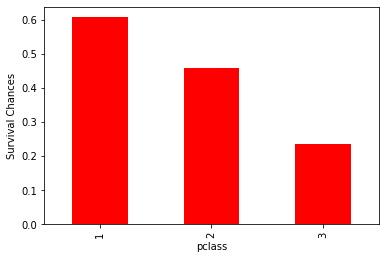

In [21]:
class_group['survived'].plot.bar(color='r')
plt.ylabel('Survival Chances')
plt.show()
#people in passenger class 1 were more survived

In [22]:
passenger_gender=df.groupby('sex').mean()
passenger_gender
#the average data wrt sex.This shows tthat female had more siblings,paid more fare and had more chances of survival

,pclass,age,sibsp,parch,fare,body,survived
sex,,,,,,,
female,2.147157,28.858401,0.709030,0.585284,47.342770,184.200000,0.702341
male,2.413793,29.898256,0.421053,0.272232,26.765991,164.470588,0.186933


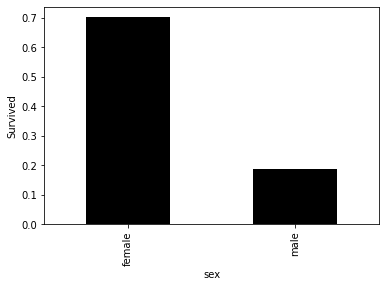

In [24]:
passenger_gender['survived'].plot.bar(color='k')
plt.ylabel('Survived')
plt.show()
#This shows that more females have survived than male.This may be either because they are more in number or because they got the priority while rescuing.

In [25]:
s_variable,unique_counts=np.unique(df['sex'],return_counts=True)
print(s_variable)
print(unique_counts)
#This shows that females where less in number. So first assumption is contradicted. 

['female' 'male']
[299 551]


In [27]:
class_passenger=df.groupby(['pclass','sex']).mean()
class_passenger
#The data average wrt pclass and sex.This shows that more aged group were females in class 1,they paid more fare and they had high chances of survival

age     sibsp     parch        fare        body  survived
pclass sex                                                                    
1      female  38.134831  0.563830  0.531915  111.387546         NaN  0.946809
       male    40.025439  0.303571  0.312500   74.165774  172.916667  0.321429
2      female  26.976562  0.507463  0.507463   22.036506         NaN  0.895522
       male    29.731884  0.353535  0.212121   20.734342  180.800000  0.161616
3      female  21.275986  0.905797  0.659420   16.004441  184.200000  0.442029
       male    26.002058  0.479412  0.276471   12.867340  149.034483  0.150000

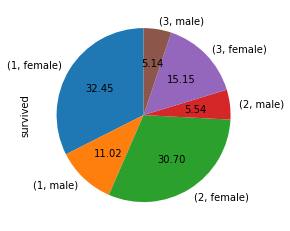

In [29]:
class_passenger['survived'].plot.pie(autopct='%1.2f',startangle=90)

plt.show()
#this shows female in class 1 were more survived

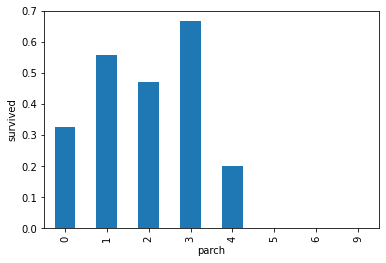

In [39]:
parch_estimate=df.groupby(['parch']).mean()
parch_estimate['survived'].plot.bar()
plt.ylabel('survived')
plt.show()
#people who are in parch 3 had more chance to get survived

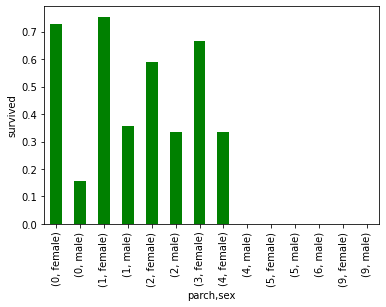

In [43]:
parch_estimate=df.groupby(['parch','sex']).mean()
parch_estimate['survived'].plot.bar(color='g')
plt.ylabel('survived')
plt.show()
#but when we also group using sex, the females who were in parch 1 has more chance of survival.

In [46]:
homedest_estimate=df.groupby(['home.dest']).mean()
homedest_estimate
#The people in the ship where not from the same place and probably they belong to different classes of people

,pclass,age,sibsp,parch,fare,body,survived
home.dest,,,,,,,
"?Havana, Cuba",1.0,28.500000,0.000000,0.00,27.720800,189.0,0.000000
"Aberdeen / Portland, OR",2.0,26.000000,0.000000,0.00,15.750000,NaN,1.000000
"Altdorf, Switzerland",3.0,21.500000,1.000000,0.00,17.800000,NaN,0.000000
"Amenia, ND",1.0,46.000000,1.000000,0.00,61.175000,NaN,0.000000
"Antwerp, Belgium / Stanton, OH",3.0,22.000000,0.000000,0.00,9.000000,NaN,0.000000
...,...,...,...,...,...,...,...
"Wimbledon Park, London / Hayling Island, Hants",1.0,62.000000,0.000000,0.00,26.550000,NaN,0.000000
"Winnipeg, MB",1.0,47.500000,1.250000,2.75,235.615625,147.0,0.500000
"Winnipeg, MN",1.0,36.000000,0.000000,0.00,75.241700,NaN,0.000000


In [51]:
homedest_number=homedest_estimate.shape
print(f'The total number of destination of passengers are {homedest_number[0]}')

The total number of destination of passengers are 272


In [55]:
siblings_estimate=df.groupby(['sibsp','sex']).mean()
siblings_estimate

pclass        age     parch       fare        body  survived
sibsp sex                                                                   
0     female  2.190184  29.392857  0.343558  41.326996  266.500000  0.736196
      male    2.448780  31.313582  0.075610  20.804847  159.680000  0.173171
1     female  1.990654  30.067340  0.766355  53.216394  129.333333  0.728972
      male    2.141509  30.098567  0.783019  44.842768  195.562500  0.273585
2     female  1.818182  29.400000  0.636364  72.029173         NaN  0.818182
      male    2.571429  22.181818  0.357143  44.685121         NaN  0.142857
3     female  2.714286  16.500000  1.142857  57.746443         NaN  0.285714
      male    3.000000  10.600000  1.200000  23.190000    4.000000  0.000000
4     female  3.000000   6.600000  2.000000  31.297500         NaN  0.200000
      male    3.000000   7.444444  1.222222  33.148611         NaN  0.111111
5     female  3.000000  13.000000  2.000000  46.900000         NaN  0.000000
      male    3.000000  11.333333  2.000000  46.900000         NaN  0.000000
8     female  3.000000        NaN  2.000000  69.550000         NaN  0.000000
      male    3.000000  14.500000  2.000000  69.550000   67.000000  0.000000

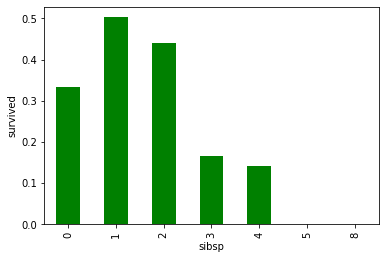

In [69]:
sibling_estimate=df.groupby(['sibsp']).mean()
sibling_estimate['survived'].plot.bar(color='g')
plt.ylabel('survived')
plt.show()
#Those who were having 1 siblings had more chances of survival

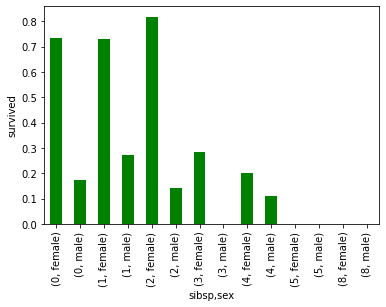

In [70]:
sibling_estimate=df.groupby(['sibsp','sex']).mean()
sibling_estimate['survived'].plot.bar(color='g')
plt.ylabel('survived')
plt.show()
#But when we are analyzing deeper the females who were having 2 siblings has more chances of survival

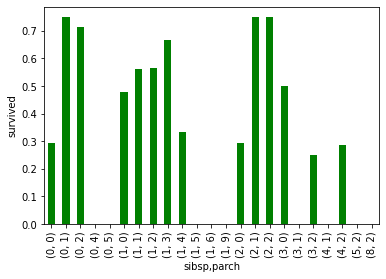

In [74]:
sibling_estimate=df.groupby(['sibsp','parch']).mean()
sibling_estimate['survived'].plot.bar(color='g')
plt.ylabel('survived')
plt.show()

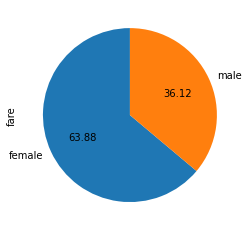

In [77]:
fair_estimate=df.groupby('sex').mean()
fair_estimate['fare'].plot.pie(autopct='%3.2f',startangle=90)
plt.show()
#females were more contributing than males

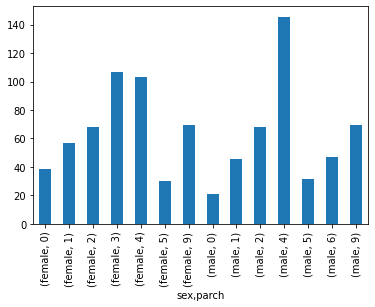

In [79]:
fair_estimate=df.groupby(['sex','parch']).mean()
fair_estimate['fare'].plot.bar()
plt.show()
#but the male who were in parch 4 were paying the more fare

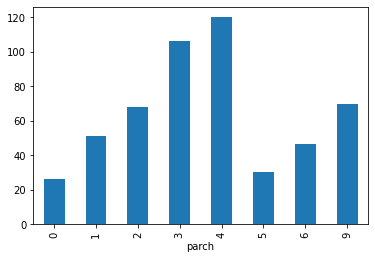

In [81]:
fair_estimate=df.groupby('parch').mean()
fair_estimate['fare'].plot.bar()
plt.show()
#parch 4 had more wages

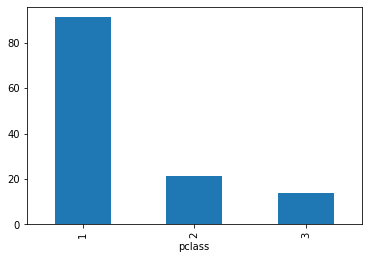

In [82]:
fair_estimate=df.groupby('pclass').mean()
fair_estimate['fare'].plot.bar()
plt.show()
#passenger class 1 had more wages

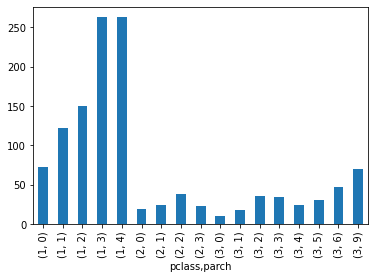

In [83]:
fair_estimate=df.groupby(['pclass','parch']).mean()
fair_estimate['fare'].plot.bar()
plt.show()
#class 1 ,parch 3 and 4 had more fare. class 3 parch 0 had less fare

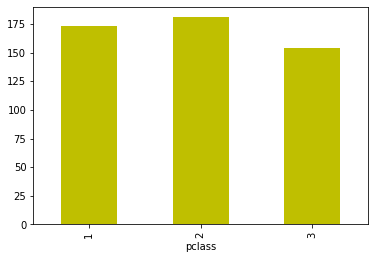

In [86]:
boat_estimate=df.groupby(['pclass']).mean()
boat_estimate['body'].plot.bar(color='y')
plt.show()

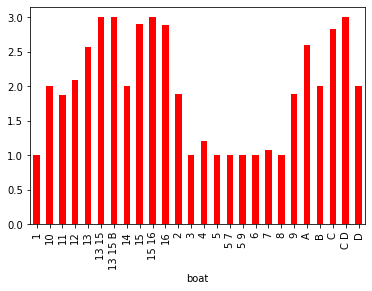

In [93]:

boat_estimate=df.groupby(['boat']).mean()
boat_estimate['pclass'].plot.bar(color='r')
plt.show()

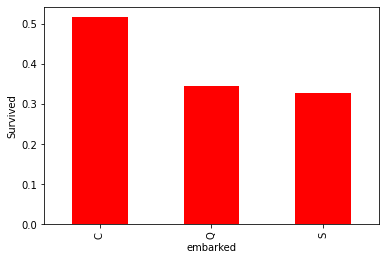

In [96]:
embarked_estimate=df.groupby(['embarked']).mean()
embarked_estimate['survived'].plot.bar(color='r')
plt.ylabel('Survived')
plt.show()